In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from datetime import datetime 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime

In [2]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
#sys.path //uncomment this line to verify current paths
from cifar10 import alexnet
from cifar10 import utils
from datetime import datetime

# AlexLikeNet model benchmarking on CIFAR-10 dataset
In this notebook, we look at the training error and test error and confusion matrix of an AlexNet like model on CIFAR-10 dataset.
The objective is to track the above as we train the model on every epoch.

In [3]:
trainset, trainloader = utils.getTrainsetAndLoader(10)
testset, testloader = utils.getTestSetAndLoader(10)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import torch.optim as optim

net = alexnet.AlexNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Evaluate on untrained model
Evaluate the model on untrained model and look at confusion matrix, accuracy and evaluation time.
Typically you will notice that everything is being predicted as one or two random labels.
You can also verify the confusion matrix plot by observing vertical lines parallel to TrueLabel axis.

Accuracy of the network on the 10000 test images: 10 %
Time taken to score all the 1000 test images : 3 seconds


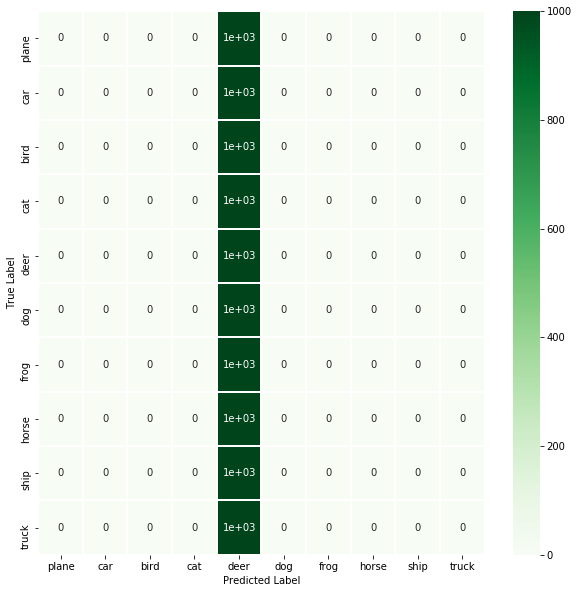

In [5]:
correct, total, confMatrix, eval_time = utils.evaluateCifar10(net, testloader)
plt.figure(figsize=(10, 10))
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
print("Time taken to score all the 1000 test images : {} seconds".format(eval_time.seconds))
ax = sns.heatmap(confMatrix, linewidth=1, xticklabels=utils.classes, yticklabels=utils.classes, annot=True, cmap="Greens")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

## Run first 10 training epochs
Train ten epochs and report accuracy, eval time and also the confusion matrix.
This helps understand how the LeNet algorithm evolves with more training epochs.

In [6]:
train_metrics = {}
eval_metrics = {}

After training epoch#1, training error = 9699.18006873, training time = 82 seconds
Accuracy of the network on the 10000 test images: 42 %
Time taken to score all the 1000 test images : 4 seconds


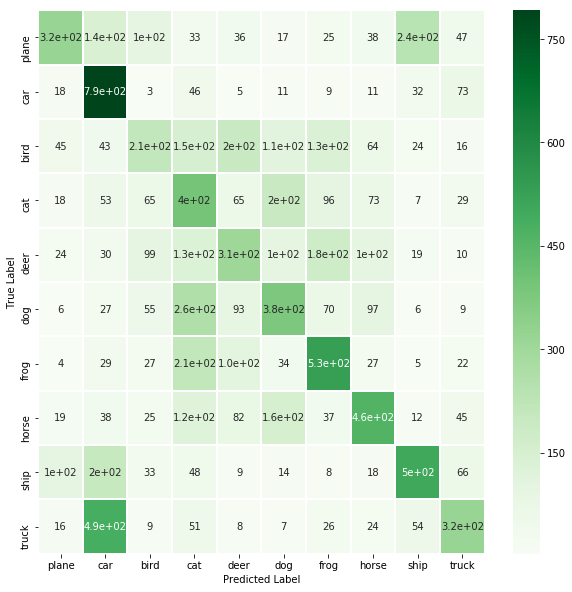

Finished Training and evaluation on epoch-1
After training epoch#2, training error = 7291.79889697, training time = 81 seconds
Accuracy of the network on the 10000 test images: 52 %
Time taken to score all the 1000 test images : 4 seconds


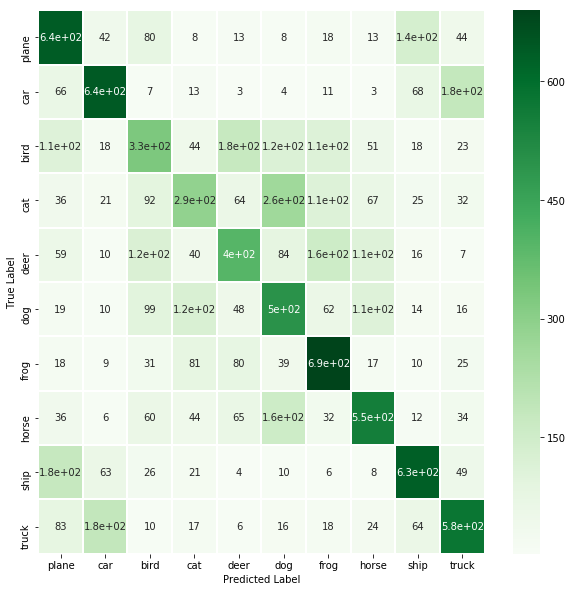

Finished Training and evaluation on epoch-2
After training epoch#3, training error = 6402.70546439, training time = 83 seconds
Accuracy of the network on the 10000 test images: 55 %
Time taken to score all the 1000 test images : 4 seconds


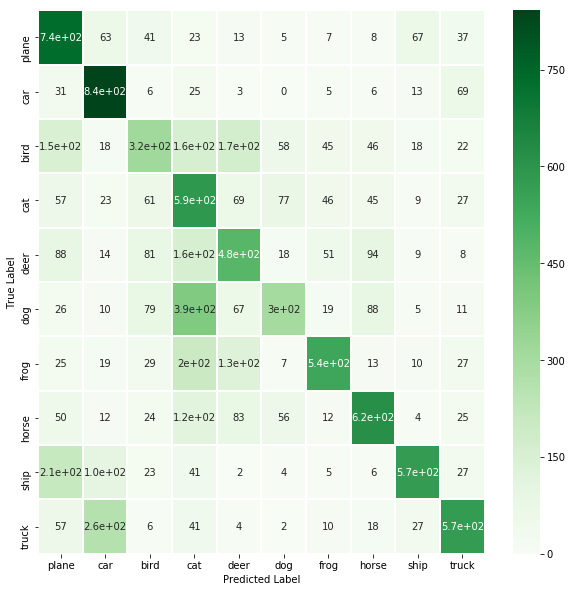

Finished Training and evaluation on epoch-3
After training epoch#4, training error = 5635.71084787, training time = 84 seconds
Accuracy of the network on the 10000 test images: 58 %
Time taken to score all the 1000 test images : 4 seconds


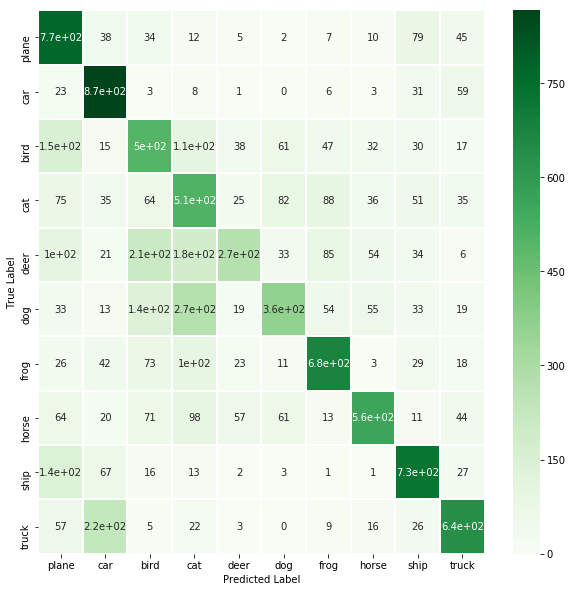

Finished Training and evaluation on epoch-4
After training epoch#5, training error = 4990.07489894, training time = 85 seconds
Accuracy of the network on the 10000 test images: 66 %
Time taken to score all the 1000 test images : 4 seconds


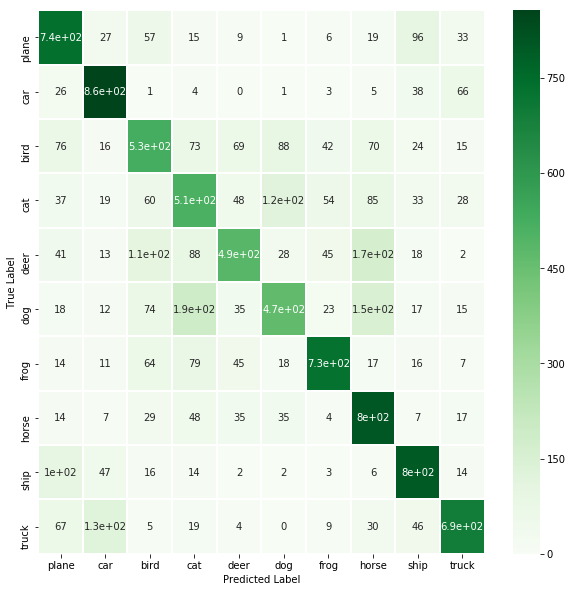

Finished Training and evaluation on epoch-5
After training epoch#6, training error = 4484.48892806, training time = 82 seconds
Accuracy of the network on the 10000 test images: 66 %
Time taken to score all the 1000 test images : 4 seconds


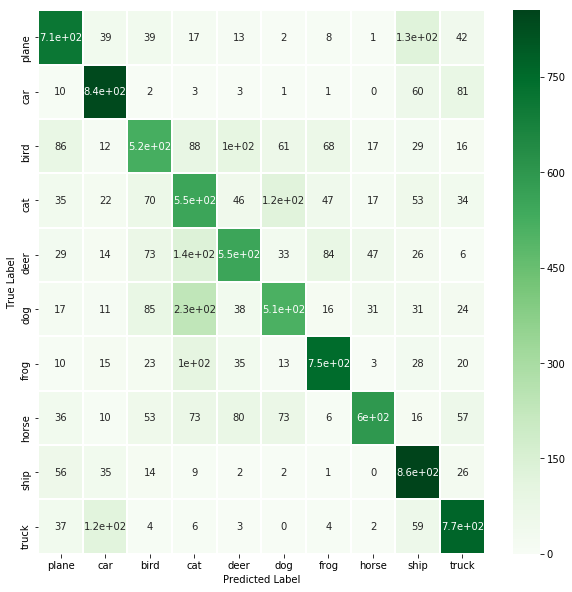

Finished Training and evaluation on epoch-6
After training epoch#7, training error = 4061.11369596, training time = 80 seconds
Accuracy of the network on the 10000 test images: 68 %
Time taken to score all the 1000 test images : 4 seconds


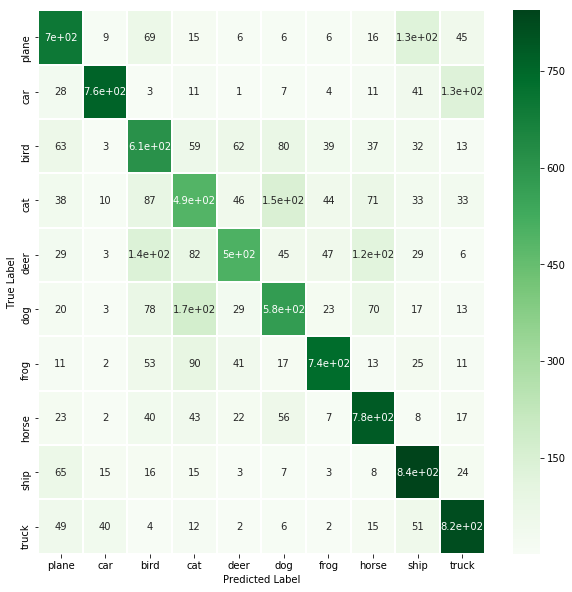

Finished Training and evaluation on epoch-7
After training epoch#8, training error = 3709.48712374, training time = 81 seconds
Accuracy of the network on the 10000 test images: 68 %
Time taken to score all the 1000 test images : 4 seconds


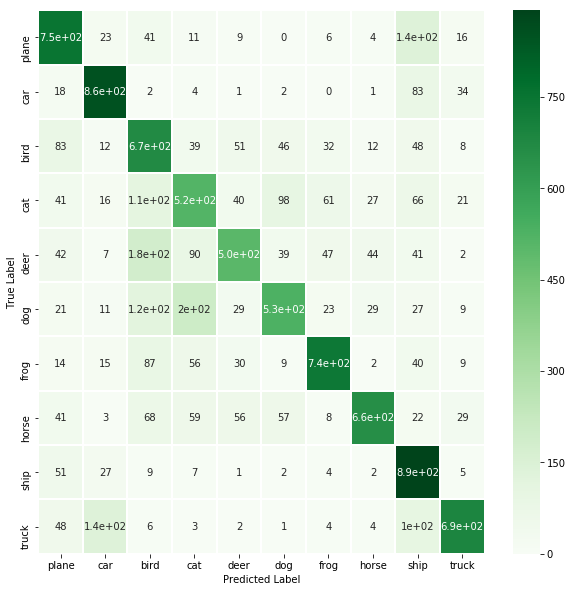

Finished Training and evaluation on epoch-8
After training epoch#9, training error = 3335.9200208, training time = 80 seconds
Accuracy of the network on the 10000 test images: 70 %
Time taken to score all the 1000 test images : 4 seconds


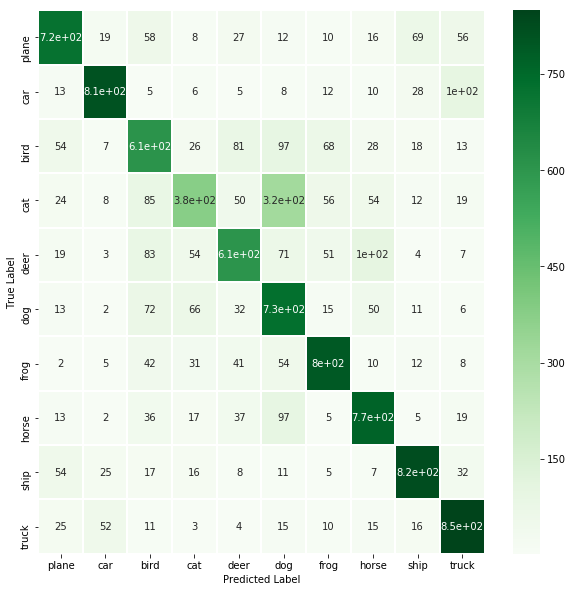

Finished Training and evaluation on epoch-9
After training epoch#10, training error = 2997.98150127, training time = 80 seconds
Accuracy of the network on the 10000 test images: 70 %
Time taken to score all the 1000 test images : 4 seconds


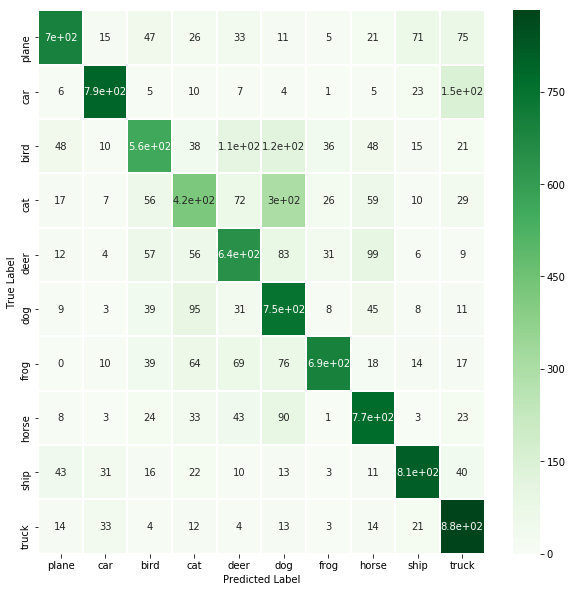

Finished Training and evaluation on epoch-10


In [7]:
for epoch in range(1, 11):  # loop over the dataset multiple times

    total_loss = 0.0
    train_start_time = datetime.now() 

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()

    train_time = datetime.now() - train_start_time
    train_metrics[epoch] = total_loss, train_time
    print('After training epoch#{}, training error = {}, training time = {} seconds'.format(epoch, total_loss, train_time.seconds))

    # Test the loss
    correct, total, confMatrix, eval_time = utils.evaluateCifar10(net, testloader)
    plt.figure(figsize=(10, 10))
    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    print("Time taken to score all the 1000 test images : {} seconds".format(eval_time.seconds))
    ax = sns.heatmap(confMatrix, linewidth=1, xticklabels=utils.classes, yticklabels=utils.classes, annot=True, cmap="Greens")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    eval_metrics[epoch] = correct, total, confMatrix, eval_time
    
    print('Finished Training and evaluation on epoch-{}'.format(epoch))

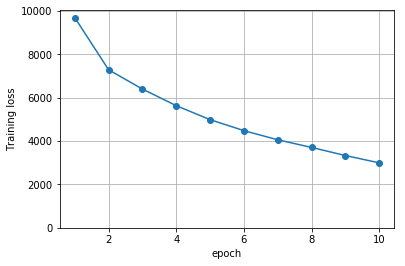

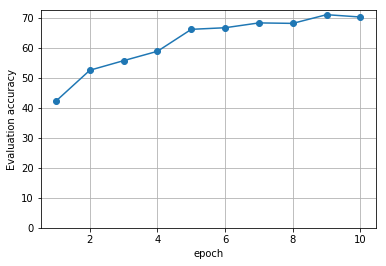

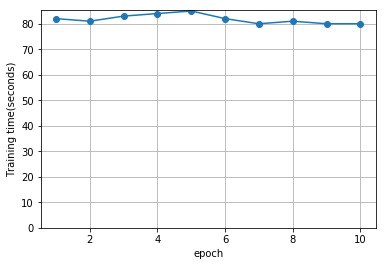

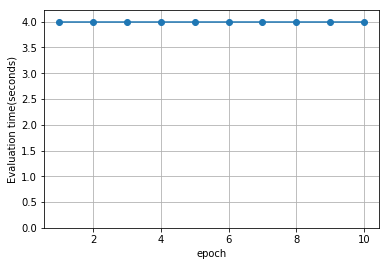

In [8]:
epochs = range(1,11)
training_loss = []
training_time = []
test_accuracy = []
test_time = []

for epoch in epochs:
    total_loss, train_time = train_metrics[epoch]
    training_loss.append(total_loss)
    training_time.append(train_time.seconds)
    
    correct, total, _, eval_time = eval_metrics[epoch]
    test_accuracy.append(100.0*correct/float(total))
    test_time.append(eval_time.seconds)

plt.plot(epochs, training_loss, marker = 'o')
plt.xlabel('epoch')
plt.ylabel('Training loss')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

plt.plot(epochs, test_accuracy, marker = 'o')
plt.xlabel('epoch')
plt.ylabel('Evaluation accuracy')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

plt.plot(epochs, training_time, marker = 'o')
plt.xlabel('epoch')
plt.ylabel('Training time(seconds)')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

plt.plot(epochs, test_time, marker = 'o')
plt.xlabel('epoch')
plt.ylabel('Evaluation time(seconds)')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

## Run training on 11-100 epochs
Now we train and evaluate on another 90 epochs and see if test error is changing.
Looking at the first 10 epochs, it is not very likely to improve now

In [9]:
for epoch in range(11, 101):  # loop over the dataset multiple times

    total_loss = 0.0
    train_start_time = datetime.now() 

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()

    train_time = datetime.now() - train_start_time
    train_metrics[epoch] = total_loss, train_time
    #print('After training epoch#{}, training error = {}, training time = {} seconds'.format(epoch, total_loss, train_time.seconds))

    # Test the loss
    eval_metrics[epoch] = utils.evaluateCifar10(net, testloader)    
    print('Finished Training and evaluation on epoch#{}'.format(epoch))

Finished Training and evaluation on epoch#11
Finished Training and evaluation on epoch#12
Finished Training and evaluation on epoch#13
Finished Training and evaluation on epoch#14
Finished Training and evaluation on epoch#15
Finished Training and evaluation on epoch#16
Finished Training and evaluation on epoch#17
Finished Training and evaluation on epoch#18
Finished Training and evaluation on epoch#19
Finished Training and evaluation on epoch#20
Finished Training and evaluation on epoch#21
Finished Training and evaluation on epoch#22
Finished Training and evaluation on epoch#23
Finished Training and evaluation on epoch#24
Finished Training and evaluation on epoch#25
Finished Training and evaluation on epoch#26
Finished Training and evaluation on epoch#27
Finished Training and evaluation on epoch#28
Finished Training and evaluation on epoch#29
Finished Training and evaluation on epoch#30
Finished Training and evaluation on epoch#31
Finished Training and evaluation on epoch#32
Finished T

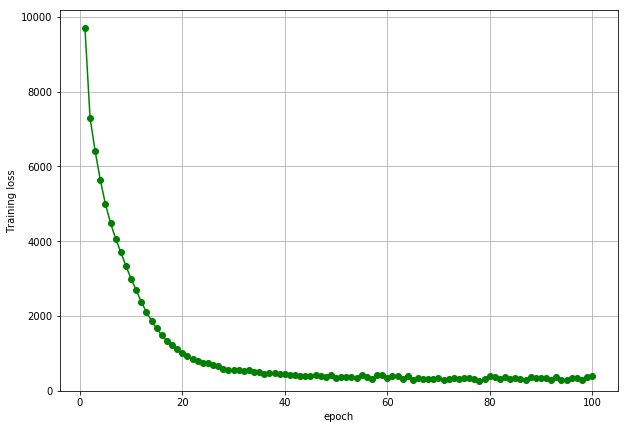

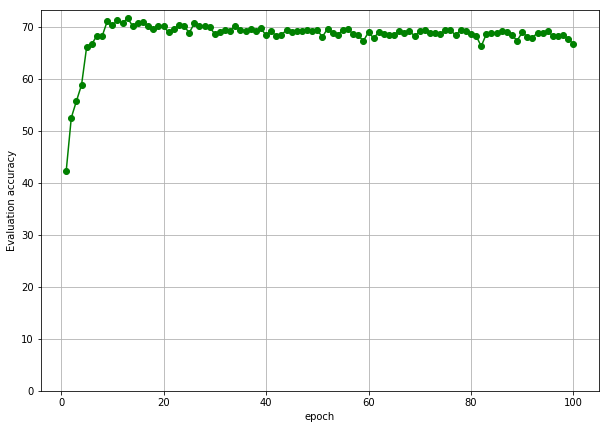

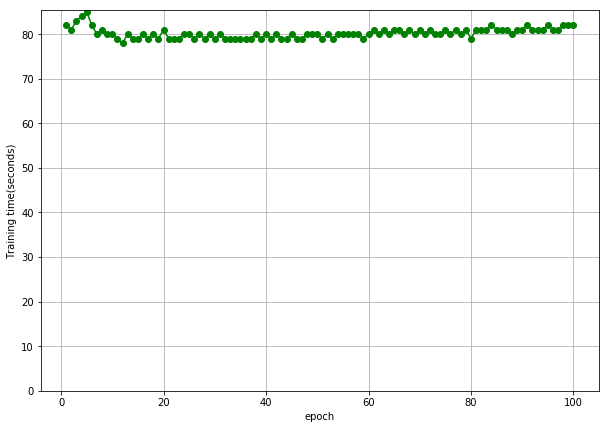

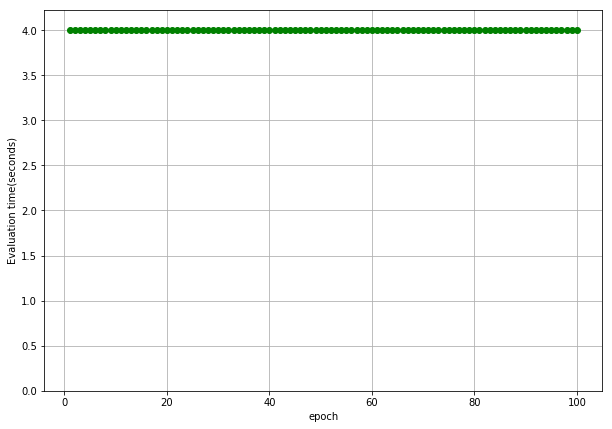

In [10]:
epochs = range(1,101)
training_loss = []
training_time = []
test_accuracy = []
test_time = []

for epoch in epochs:
    total_loss, train_time = train_metrics[epoch]
    training_loss.append(total_loss)
    training_time.append(train_time.seconds)
    
    correct, total, _, eval_time = eval_metrics[epoch]
    test_accuracy.append(100.0*correct/float(total))
    test_time.append(eval_time.seconds)

plt.figure(figsize=(10, 7))
plt.plot(epochs, training_loss, marker = 'o', color='g')
plt.xlabel('epoch')
plt.ylabel('Training loss')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(epochs, test_accuracy, marker = 'o', color='g')
plt.xlabel('epoch')
plt.ylabel('Evaluation accuracy')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(epochs, training_time, marker = 'o', color='g')
plt.xlabel('epoch')
plt.ylabel('Training time(seconds)')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(epochs, test_time, marker = 'o', color='g')
plt.xlabel('epoch')
plt.ylabel('Evaluation time(seconds)')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

## Training loss vs test accuracy
Interestingly the correlation is not very strongly visible.
There is a strong cluster indicating consistent behavior.

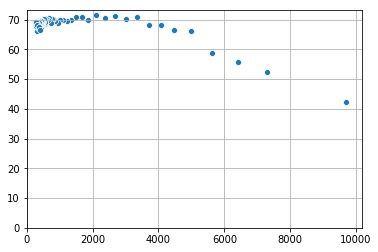

In [11]:
sns.scatterplot(x=training_loss, y=test_accuracy)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid(True)

## Final model
Here is how the model looks like after 100 epochs of training

Accuracy of the network on the 10000 test images: 66 %
Time taken to score all the 1000 test images : 4 seconds


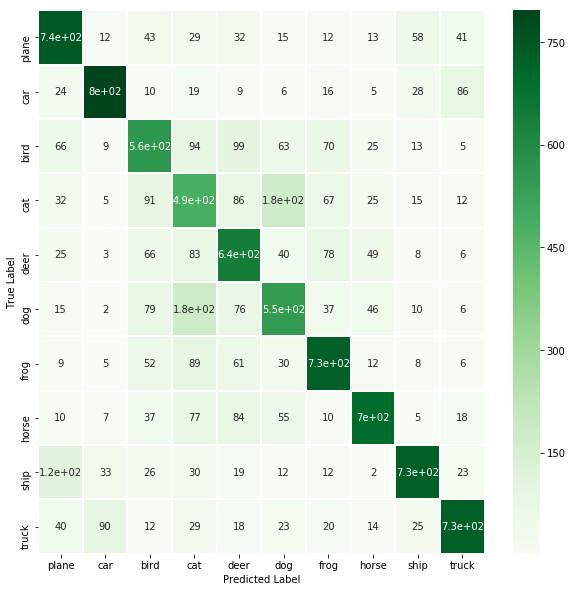

In [12]:
correct, total, confMatrix, eval_time = utils.evaluateCifar10(net, testloader)
plt.figure(figsize=(10, 10))
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
print("Time taken to score all the 1000 test images : {} seconds".format(eval_time.seconds))
ax = sns.heatmap(confMatrix, linewidth=1, xticklabels=utils.classes, yticklabels=utils.classes, annot=True, cmap="Greens")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()